In [37]:
# Housekeeping Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
# Load data created in Lab 01 earlier
students_df = pd.read_csv('students.csv')

# Calculate average score if not already present
if 'average_score' not in students_df.columns:
    students_df['average_score'] = students_df[['math_score', 'science_score']].mean(axis=1)

## Notebook 4: Introduction to Scikit-learn

Scikit-learn is the standard machine learning library in Python.

The most important thing to understand is that **almost all models in scikit-learn
follow the same workflow**, regardless of the algorithm.

This notebook introduces that workflow using simple examples.


### 4.1 The Scikit-learn Workflow

All scikit-learn models follow the same pattern:

1. Import the model class
2. Instantiate the model (optionally with hyperparameters)
3. Fit the model to training data
4. Use the model to make predictions
5. Evaluate the model

This pattern is the same for:
- regression
- classification
- clustering

### 4.2 Feature Scaling

Many machine learning algorithms are sensitive to the scale of input features.

Feature scaling ensures that all features contribute equally to the model.
One common approach is **standardisation**:
- mean = 0
- standard deviation = 1

In [39]:
# Select features
X = students_df[['age', 'math_score']].values

# Standardise features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled features:")
print(X_scaled)

Scaled features:
[[-1.17953565  0.11800488]
 [ 0.29488391 -1.79957446]
 [-0.44232587  0.8555354 ]
 [ 1.03209369  0.56052319]
 [-1.17953565 -1.20955005]
 [ 0.29488391  1.59306591]
 [-0.44232587 -0.32451343]
 [ 1.76930347 -0.76703174]
 [-1.17953565  1.0030415 ]
 [ 1.03209369 -0.02950122]]


### 4.3 Supervised Learning Example: Linear Regression

We will use linear regression to predict science scores
based on maths score and attendance.

This is a supervised learning task because:
- inputs (features) are known
- target values are known

In [40]:
X = students_df[['math_score', 'attendance']]
y = students_df['science_score']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (10, 2)
Target vector shape: (10,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 7
Testing samples: 3


In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [43]:
y_pred = model.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")

Model Performance:
Mean Squared Error: 25.70
R² Score: -0.896


- Lower MSE is better
- R² closer to 1 indicates better fit

In [45]:
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred.round(1),
    'Difference': (y_test.values - y_pred).round(1)
})

print(comparison)

   Actual  Predicted  Difference
0      94       88.3         5.7
1      85       78.4         6.6
2      89       89.9        -0.9


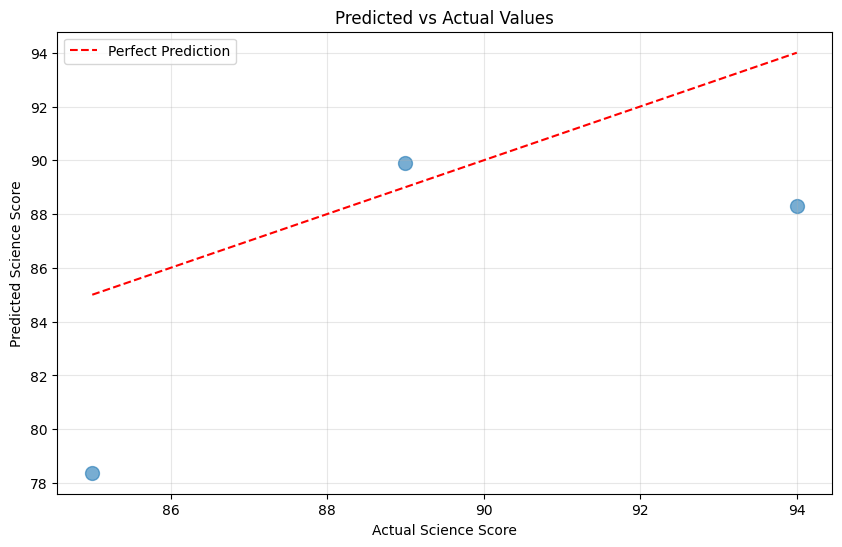

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, s=100)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    label='Perfect Prediction'
)
plt.xlabel('Actual Science Score')
plt.ylabel('Predicted Science Score')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [47]:
print("Model Parameters:")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

print("\nInterpretation:")
print(
    f"Science Score = {model.intercept_:.1f} + "
    f"{model.coef_[0]:.2f} * Maths + "
    f"{model.coef_[1]:.2f} * Attendance"
)

Model Parameters:
Coefficients: [0.25778363 0.55777372]
Intercept: 11.293845304336756

Interpretation:
Science Score = 11.3 + 0.26 * Maths + 0.56 * Attendance


### 4.4 Unsupervised Learning Example: KMeans Clustering

Clustering is an unsupervised learning task.
There are no target labels — the algorithm groups data based on similarity.

In [48]:
X = students_df[['age', 'math_score']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_scaled)

print("Cluster labels:")
print(kmeans.labels_)

Cluster labels:
[1 1 0 0 1 0 1 0 0 0]


### 4.5 Classification Example

In classification, the goal is to predict a **category**, not a number.

Here we create a simple binary classification task:
- 0 = Low performer
- 1 = High performer

This is a supervised learning problem because the labels are known.

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create binary labels: 1 = high performer, 0 = low performer
students_df['performance'] = (students_df['average_score'] > 85).astype(int)

print("Class distribution:")
print(students_df['performance'].value_counts())

Class distribution:
performance
0    6
1    4
Name: count, dtype: int64


In [50]:
X_class = students_df[['math_score', 'attendance']]
y_class = students_df['performance']

In [51]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42
)

In [52]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train_c, y_train_c)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [53]:
y_pred_c = clf.predict(X_test_c)

accuracy = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 100.00%


In [54]:
print(classification_report(
    y_test_c,
    y_pred_c,
    target_names=['Low Performer', 'High Performer']
))

                precision    recall  f1-score   support

 Low Performer       1.00      1.00      1.00         1
High Performer       1.00      1.00      1.00         2

      accuracy                           1.00         3
     macro avg       1.00      1.00      1.00         3
  weighted avg       1.00      1.00      1.00         3



Note:
Accuracy is sufficient for now.
Precision and recall will be covered later in the module.

### 4.6 Working with Image Data in Scikit-learn

Here we use unsupervised learning (clustering) to group similar pixel colours.

Each pixel is treated as a data point with three features:
- Red
- Green
- Blue

In [55]:
img = np.array(Image.open('pattern.png'))

# Reshape image to (number_of_pixels, 3)
pixels = img.reshape(-1, 3)

print("Pixels shape:", pixels.shape)

Pixels shape: (90000, 3)


Each row now represents one pixel.
Each column represents a colour channel (R, G, B).

In [56]:
pixels_norm = pixels / 255.0

In [57]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(pixels_norm)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",5
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


Takeaway:
Clustering can be used to discover structure in data without labels.
Here, it finds dominant colours in an image.

---

## Lab 01 – Notebook 04 Cheat Sheet
### Introduction to Scikit-learn

---

### The Golden Rule

**All scikit-learn models follow the same pattern:**

```python
from sklearn.some_module import SomeModel

model = SomeModel()          # 1. Create the model
model.fit(X_train, y_train)  # 2. Train on data
predictions = model.predict(X_test)  # 3. Make predictions
```

This works for regression, classification, and clustering.

---

### Feature Scaling (StandardScaler)

Many algorithms need features on the same scale.

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

| What it does | Result |
|--------------|--------|
| Centres data | Mean = 0 |
| Scales data | Std = 1 |

---

### Train/Test Split

Always split data before training to test on unseen data.

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
```

| Parameter | Meaning |
|-----------|---------|
| `test_size=0.3` | 30% for testing, 70% for training |
| `random_state=42` | Makes split reproducible |

---

### Supervised Learning

**You have labels (answers) to learn from.**

#### Regression (predict a number)

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
```

#### Regression Metrics

```python
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)  # Lower is better
r2 = r2_score(y_test, y_pred)             # Closer to 1 is better
```

| Metric | Good Value |
|--------|------------|
| MSE | As low as possible |
| R² | Close to 1.0 |

---

#### Classification (predict a category)

```python
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
```

#### Classification Metrics

```python
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
```

| Metric | What it measures |
|--------|------------------|
| Accuracy | % of correct predictions |
| Precision | Of predicted positives, how many were right? |
| Recall | Of actual positives, how many did we find? |

---

### Unsupervised Learning

**No labels — find patterns in data.**

#### Clustering (group similar items)

```python
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_  # Which cluster each point belongs to
```

---

### Quick Reference Table

| Task | Algorithm | Key Import |
|------|-----------|------------|
| Predict a number | Linear Regression | `LinearRegression` |
| Predict a category | Decision Tree | `DecisionTreeClassifier` |
| Group similar items | KMeans | `KMeans` |
| Scale features | StandardScaler | `StandardScaler` |
| Split data | train_test_split | `train_test_split` |

---

### Model Inspection

```python
# Linear Regression
model.coef_        # Feature weights
model.intercept_   # Bias term

# KMeans
kmeans.labels_         # Cluster assignments
kmeans.cluster_centers_  # Cluster centres
```

---

### Common Workflow

```
1. Load data (pandas)
2. Select features (X) and target (y)
3. Split into train/test
4. Scale features (if needed)
5. Create model
6. Fit model on training data
7. Predict on test data
8. Evaluate performance
```

---

### Key Takeaways

- Scikit-learn has a consistent API — learn it once, use it everywhere
- Always split data before training
- Scale features when using distance-based algorithms
- Regression predicts numbers, classification predicts categories
- Clustering finds groups without labels
- Evaluate models on data they haven't seen before